In [28]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [29]:
df1 = pd.read_csv("DA project Data prep.csv")
df1

,Name,Gender,Age Group,Do you read the nutritional info on the packaged /processed food products before buying?,PCS,SD,CH,BKP,IC,BSC
0,Laukika Kulkarni,Female,18 - 24,Never,1.0,1.0,1.0,1.0,1.0,1.0
1,Pranjali Joshi,Female,Mid-Adult-40-59,Never,1.0,NaN,1.0,NaN,1.0,1.0
2,Darpan,Male,Young Adult -18-39,Always,1.0,NaN,NaN,NaN,NaN,NaN
3,Dhanashree Kamble,Female,Young Adult -18-39,Maybe,1.0,NaN,1.0,1.0,1.0,1.0
4,Kedar Koshti,Male,Young Adult -18-39,Maybe,1.0,NaN,NaN,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
258,Sagar Katare,Male,Young Adult -18-39,Maybe,1.0,NaN,1.0,1.0,1.0,NaN
259,Prathamesh,Male,Below 18,Always,1.0,NaN,NaN,NaN,NaN,1.0
260,Anurag vishal shinde,Male,Below 18,Maybe,NaN,NaN,NaN,NaN,NaN,1.0
261,Sneha kishor chindhade,Female,Below 18,Maybe,1.0,NaN,1.0,NaN,NaN,NaN


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 10 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Name                                                                                      250 non-null    object 
 1   Gender                                                                                    263 non-null    object 
 2   Age Group                                                                                 263 non-null    object 
 3   Do you read the nutritional info on the packaged /processed food products before buying?  263 non-null    object 
 4   PCS                                                                                       164 non-null    float64
 5   SD                                                       

In [31]:
df1.dtypes

Name                                                                                         object
Gender                                                                                       object
Age Group                                                                                    object
Do you read the nutritional info on the packaged /processed food products before buying?     object
PCS                                                                                         float64
SD                                                                                          float64
CH                                                                                          float64
BKP                                                                                         float64
IC                                                                                          float64
BSC                                                                                         float64


In [32]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [33]:
class DtypeConverter(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, x):
        x_copy = x.copy()

        for col in x_copy.columns:
            if x_copy[col].dtype == 'object':
                x_copy[col] = x_copy[col].astype("string")

        return x_copy
    
pipeline = Pipeline([
    ('stype_conversion', DtypeConverter())
])

df2 = pipeline.fit_transform(df1)

df2.dtypes

Name                                                                                        string[python]
Gender                                                                                      string[python]
Age Group                                                                                   string[python]
Do you read the nutritional info on the packaged /processed food products before buying?    string[python]
PCS                                                                                                float64
SD                                                                                                 float64
CH                                                                                                 float64
BKP                                                                                                float64
IC                                                                                                 float64
BSC                                  

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 10 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Name                                                                                      250 non-null    string 
 1   Gender                                                                                    263 non-null    string 
 2   Age Group                                                                                 263 non-null    string 
 3   Do you read the nutritional info on the packaged /processed food products before buying?  263 non-null    string 
 4   PCS                                                                                       164 non-null    float64
 5   SD                                                       

In [35]:
df2.isnull().sum()

Name                                                                                         13
Gender                                                                                        0
Age Group                                                                                     0
Do you read the nutritional info on the packaged /processed food products before buying?      0
PCS                                                                                          99
SD                                                                                          178
CH                                                                                          120
BKP                                                                                         158
IC                                                                                          152
BSC                                                                                         101
dtype: int64

In [36]:
class Remove_Null(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_copy = X.copy()

        for col in X_copy.columns:
            if X_copy[col].dtype == "string":
                X_copy[col].fillna(value="NOT APPLICABLE", inplace=True)
            elif X_copy[col].dtype == "float64":
                X_copy[col].fillna(value=0, inplace=True)

        return X_copy

pipeline2 = Pipeline([
    ('fill_null_values', Remove_Null())
])

df3 = pipeline2.fit_transform(df2)

print(df3.isnull().sum())
    

Name                                                                                        0
Gender                                                                                      0
Age Group                                                                                   0
Do you read the nutritional info on the packaged /processed food products before buying?    0
PCS                                                                                         0
SD                                                                                          0
CH                                                                                          0
BKP                                                                                         0
IC                                                                                          0
BSC                                                                                         0
dtype: int64


In [37]:
df3.head(50)

,Name,Gender,Age Group,Do you read the nutritional info on the packaged /processed food products before buying?,PCS,SD,CH,BKP,IC,BSC
0,Laukika Kulkarni,Female,18 - 24,Never,1.0,1.0,1.0,1.0,1.0,1.0
1,Pranjali Joshi,Female,Mid-Adult-40-59,Never,1.0,0.0,1.0,0.0,1.0,1.0
2,Darpan,Male,Young Adult -18-39,Always,1.0,0.0,0.0,0.0,0.0,0.0
3,Dhanashree Kamble,Female,Young Adult -18-39,Maybe,1.0,0.0,1.0,1.0,1.0,1.0
4,Kedar Koshti,Male,Young Adult -18-39,Maybe,1.0,0.0,0.0,1.0,1.0,1.0
5,NOT APPLICABLE,Female,Young Adult -18-39,Maybe,1.0,0.0,1.0,0.0,1.0,1.0
6,Vivek Gotecha,Male,Young Adult -18-39,Always,0.0,0.0,0.0,0.0,0.0,1.0
7,Eshaan Pillay,Male,Young Adult -18-39,Always,1.0,0.0,1.0,0.0,0.0,0.0
8,Chaitanya Gagare,Male,Young Adult -18-39,Always,0.0,1.0,0.0,0.0,0.0,0.0
9,X,Male,Young Adult -18-39,Always,1.0,0.0,1.0,1.0,0.0,1.0


In [38]:
df3.drop(index = 0, inplace=True)

In [39]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

df3["Gender"].unique()

<StringArray>
['Female', 'Male', 'Prefer not to say']
Length: 3, dtype: string

In [40]:
df3["Gender"] = encode.fit_transform(df3["Gender"])
df3["Gender"].unique()

array([0, 1, 2])

In [41]:
df3["Age Group"].unique()

<StringArray>
['Mid-Adult-40-59', 'Young Adult -18-39', 'Below 18', 'Old Adult-Above 60']
Length: 4, dtype: string

In [42]:
df3["Age Group"] = encode.fit_transform(df3["Age Group"])
df3["Age Group"].unique()

array([1, 3, 0, 2])

In [43]:
df3["Do you read the nutritional info on the packaged /processed food products before buying?"].unique()

<StringArray>
['Never', 'Always', 'Maybe']
Length: 3, dtype: string

In [44]:
df3["Do you read the nutritional info on the packaged /processed food products before buying?"] = encode.fit_transform(df3["Do you read the nutritional info on the packaged /processed food products before buying?"])
df3["Do you read the nutritional info on the packaged /processed food products before buying?"].unique()

array([2, 0, 1])

In [45]:
df3

,Name,Gender,Age Group,Do you read the nutritional info on the packaged /processed food products before buying?,PCS,SD,CH,BKP,IC,BSC
1,Pranjali Joshi,0,1,2,1.0,0.0,1.0,0.0,1.0,1.0
2,Darpan,1,3,0,1.0,0.0,0.0,0.0,0.0,0.0
3,Dhanashree Kamble,0,3,1,1.0,0.0,1.0,1.0,1.0,1.0
4,Kedar Koshti,1,3,1,1.0,0.0,0.0,1.0,1.0,1.0
5,NOT APPLICABLE,0,3,1,1.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
258,Sagar Katare,1,3,1,1.0,0.0,1.0,1.0,1.0,0.0
259,Prathamesh,1,0,0,1.0,0.0,0.0,0.0,0.0,1.0
260,Anurag vishal shinde,1,0,1,0.0,0.0,0.0,0.0,0.0,1.0
261,Sneha kishor chindhade,0,0,1,1.0,0.0,1.0,0.0,0.0,0.0


In [46]:
readers_count = df3.groupby('Do you read the nutritional info on the packaged /processed food products before buying?')['Do you read the nutritional info on the packaged /processed food products before buying?'].count()
readers_count

Do you read the nutritional info on the packaged /processed food products before buying?
0     97
1    127
2     38
Name: Do you read the nutritional info on the packaged /processed food products before buying?, dtype: int64

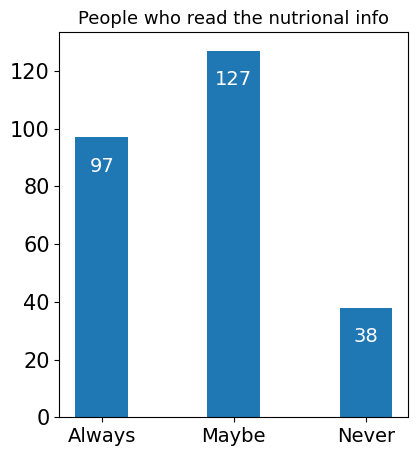

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4.5,5))
plt.bar(readers_count.index, readers_count.values, width=0.4)
plt.title("People who read the nutrional info", fontsize = 13)
plt.xticks([0,1,2] , ['Always', 'Maybe', 'Never'])
for i, value in enumerate(readers_count.values):
    plt.text(i, value - 10, str(value), fontsize=14, color='white',
             horizontalalignment='center', verticalalignment='center')
    
plt.xticks(fontsize=14)
plt.yticks(fontsize=15)
    
plt.show()

In [48]:
eating_habits_by_gender = df3.groupby('Gender')[["PCS","SD","CH", "BKP", "IC", "BSC"]].sum()
eating_habits_by_gender

,PCS,SD,CH,BKP,IC,BSC
Gender,,,,,,
0,85.0,34.0,73.0,45.0,55.0,74.0
1,77.0,50.0,68.0,58.0,54.0,86.0
2,1.0,0.0,1.0,1.0,1.0,1.0


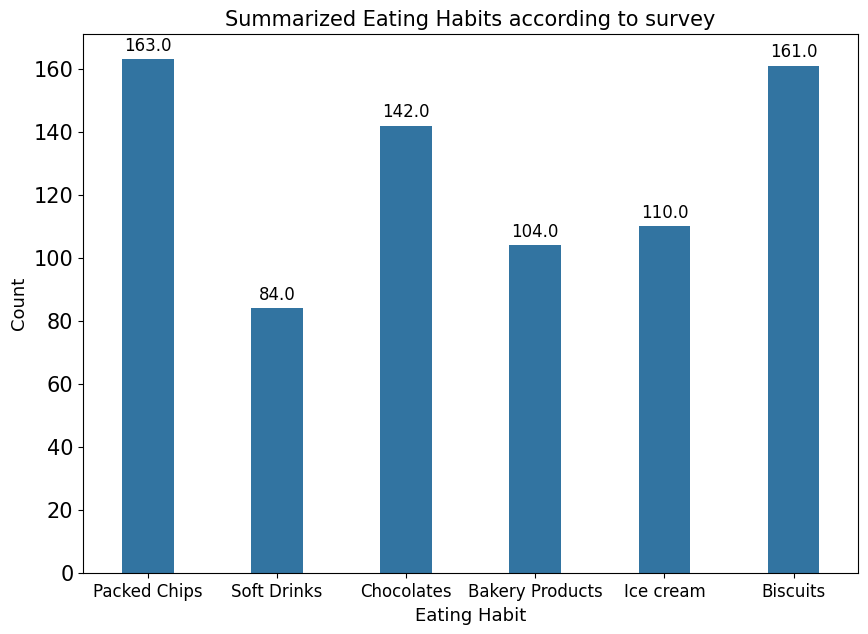

  Habit  Count
0   PCS    163
1   BSC    161
2    CH    142
3    IC    110
4   BKP    104
5    SD     84


In [72]:

df3_melted = df3.melt(value_vars=["PCS", "SD", "CH", "BKP", "IC", "BSC"], var_name='Habit', value_name='Count')
df3_yes_count = df3_melted[df3_melted['Count'] == 1]

plt.figure(figsize=(10, 7))
sns.countplot(data=df3_yes_count, x='Habit', width=0.4)

plt.title("Summarized Eating Habits according to survey", fontsize = 15)
plt.xlabel('Eating Habit', fontsize = 13)
plt.ylabel('Count', fontsize = 13)

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.xticks([0, 1, 2, 3, 4, 5], ['Packed Chips', 'Soft Drinks', 'Chocolates', 'Bakery Products', "Ice cream", "Biscuits"], fontsize=12)
plt.yticks(fontsize=15)

plt.show()

# Print the table of counts
count_table = df3_yes_count['Habit'].value_counts().reset_index()
count_table.columns = ['Habit', 'Count']
print(count_table)

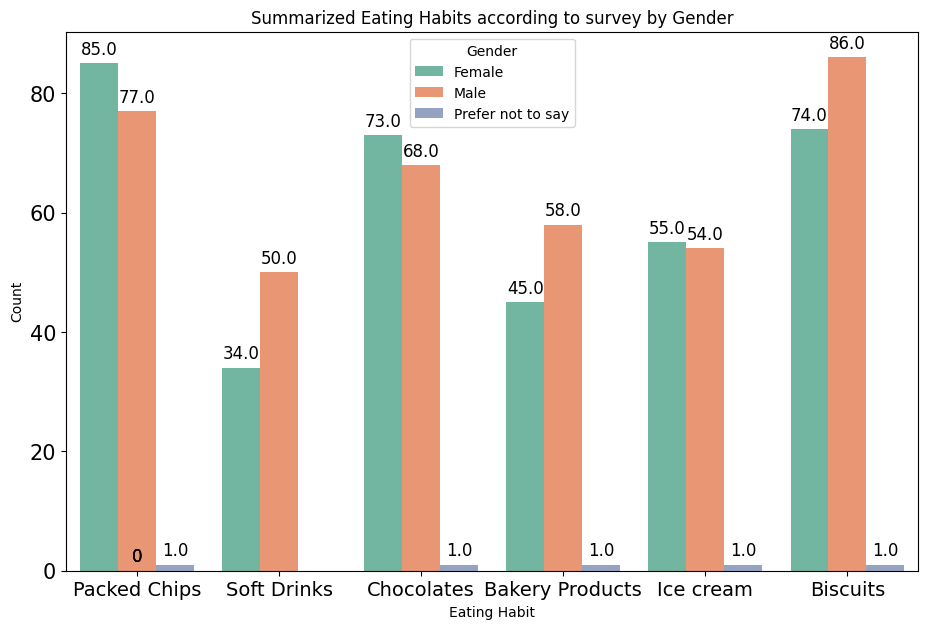

   Habit  Gender  Count
0    BKP       0    120
1    BKP       1    141
2    BKP       2      1
3    BSC       0    120
4    BSC       1    141
5    BSC       2      1
6     CH       0    120
7     CH       1    141
8     CH       2      1
9     IC       0    120
10    IC       1    141
11    IC       2      1
12   PCS       0    120
13   PCS       1    141
14   PCS       2      1
15    SD       0    120
16    SD       1    141
17    SD       2      1


In [62]:
df3_melted = df3.melt(id_vars='Gender', value_vars=["PCS", "SD", "CH", "BKP", "IC", "BSC"], var_name='Habit', value_name='Count')

df3_yes_count = df3_melted[df3_melted['Count'] == 1]

plt.figure(figsize=(11, 7))
sns.countplot(data=df3_yes_count, x='Habit', hue='Gender', palette='Set2')
plt.title("Summarized Eating Habits according to survey by Gender")
plt.xlabel('Eating Habit')
plt.ylabel('Count')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.xticks([0, 1, 2, 3, 4, 5], ['Packed Chips', 'Soft Drinks', 'Chocolates', 'Bakery Products', "Ice cream", "Biscuits"])
plt.legend(title='Gender', labels=['Female', 'Male', 'Prefer not to say'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=15)
plt.show()

habit_counts = df3_melted.groupby(['Habit', 'Gender']).size().reset_index(name='Count')
print(habit_counts)


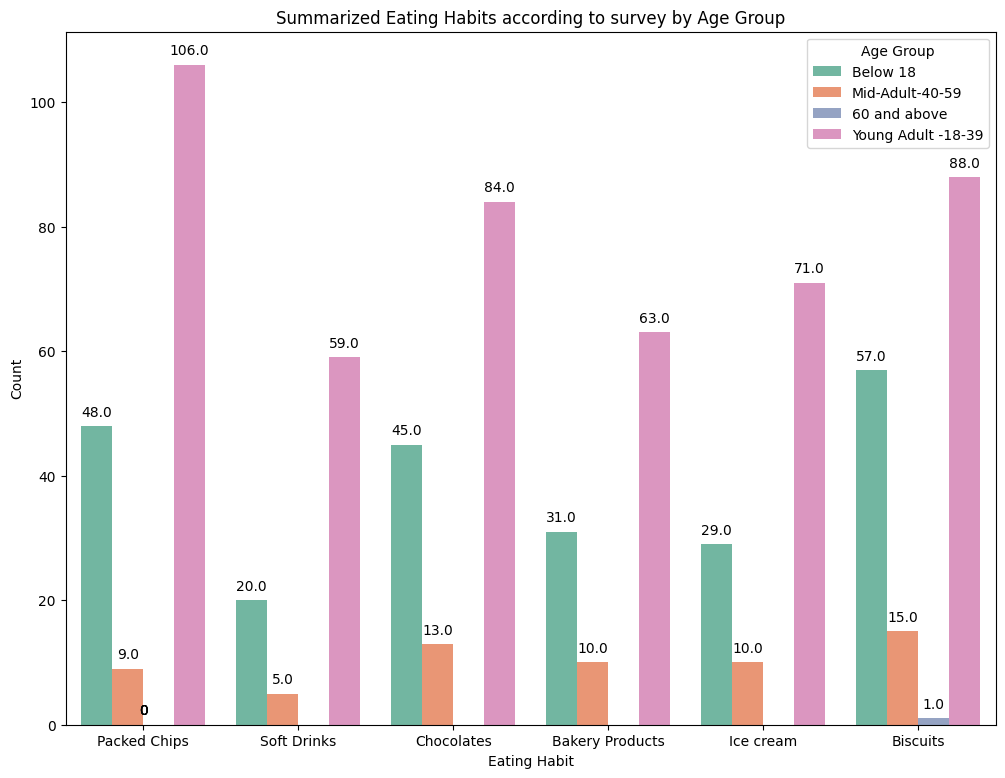

In [51]:

df3_melted = df3.melt(id_vars='Age Group', value_vars=["PCS", "SD", "CH", "BKP", "IC", "BSC"], var_name='Habit', value_name='Count')

df3_yes_count = df3_melted[df3_melted['Count'] == 1]

plt.figure(figsize=(12, 9))
sns.countplot(data=df3_yes_count, x='Habit', hue='Age Group', palette='Set2')
plt.title("Summarized Eating Habits according to survey by Age Group")
plt.xlabel('Eating Habit')
plt.ylabel('Count')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks([0, 1, 2, 3, 4, 5], ['Packed Chips', 'Soft Drinks', 'Chocolates', 'Bakery Products', "Ice cream", "Biscuits"])
plt.legend(title='Age Group', labels=['Below 18',  'Mid-Adult-40-59', '60 and above' ,'Young Adult -18-39'])
plt.show()

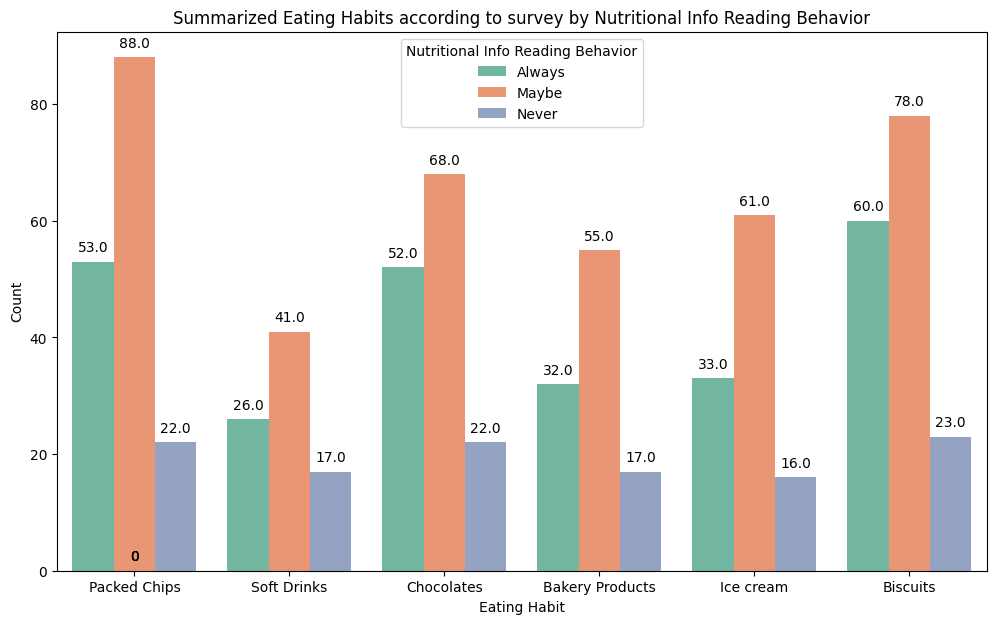

In [52]:
df3_melted = df3.melt(id_vars='Do you read the nutritional info on the packaged /processed food products before buying?', value_vars=["PCS", "SD", "CH", "BKP", "IC", "BSC"], var_name='Habit', value_name='Count')

df3_yes_count = df3_melted[df3_melted['Count'] == 1]

plt.figure(figsize=(12, 7))
sns.countplot(data=df3_yes_count, x='Habit', hue='Do you read the nutritional info on the packaged /processed food products before buying?', palette='Set2')
plt.title("Summarized Eating Habits according to survey by Nutritional Info Reading Behavior")
plt.xlabel('Eating Habit')
plt.ylabel('Count')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks([0, 1, 2, 3, 4, 5], ['Packed Chips', 'Soft Drinks', 'Chocolates', 'Bakery Products', "Ice cream", "Biscuits"])
plt.legend(title='Nutritional Info Reading Behavior', labels=['Always', 'Maybe', 'Never'])
plt.show()